In [40]:
import numpy as np
from matplotlib import pyplot as plt 
from pandas import read_csv
import sys
import os
from matplotlib import rcParams
import toml

from correlations import *
from read_in_data import *
from mass_fit import *
from mass_matteo import *
from functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
param = ("fermions", "fermion_mass")
simulations = []
for i in range(22, 42):
    dataset = Dataset(32, 32)
    dataset.add_data("./data/masses_05/conf" + str(i) + "/", param, 0)
    simulations.append(dataset)

-0.010000000000000009


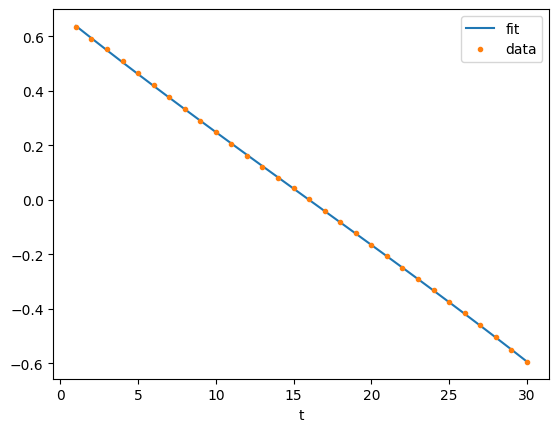

0.01999999999999999


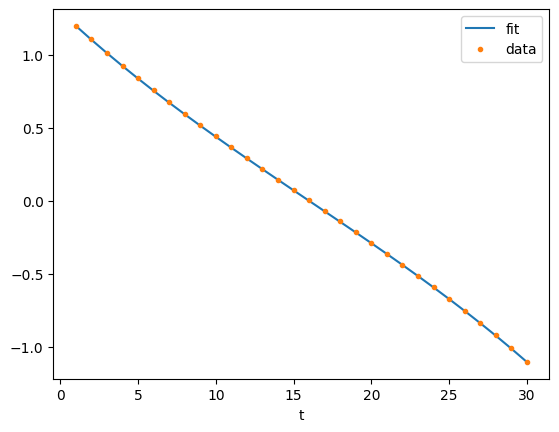

0.04999999999999999


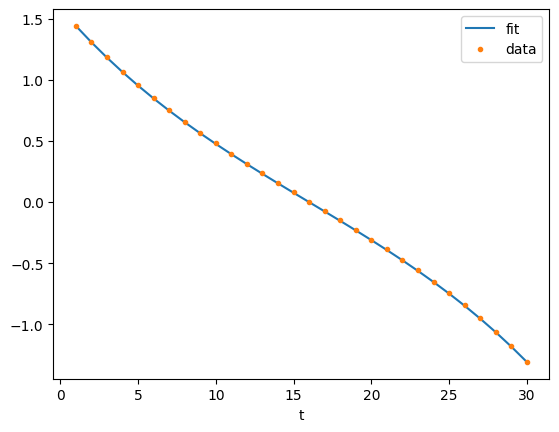

0.07999999999999999


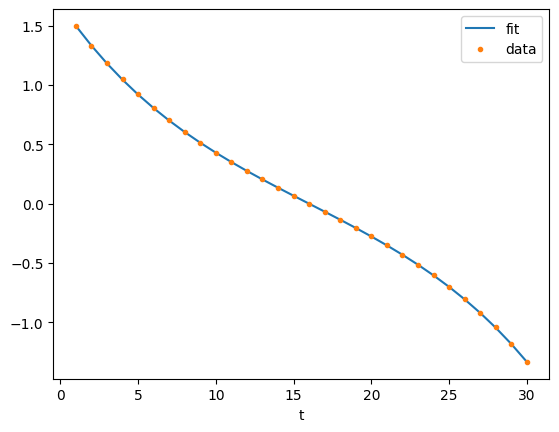

0.10999999999999999


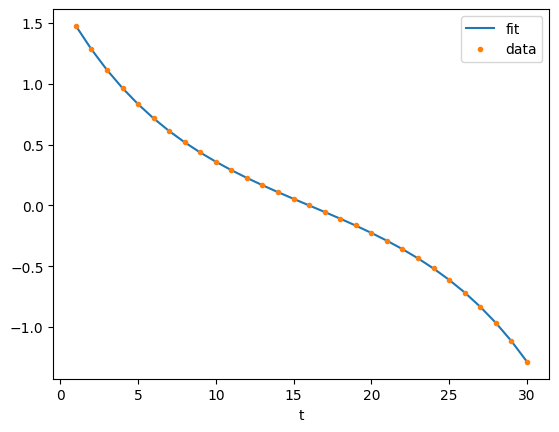

0.13999999999999999


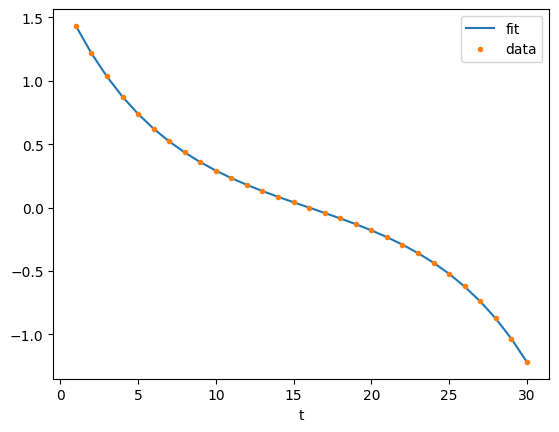

0.17


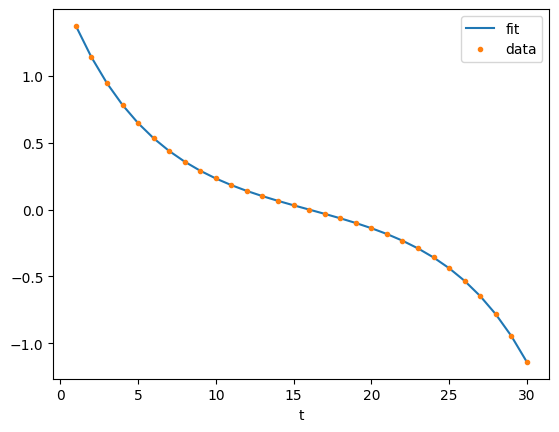

0.19999999999999998


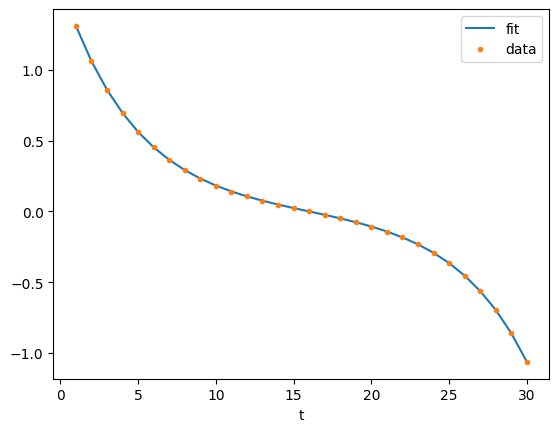

0.22999999999999995


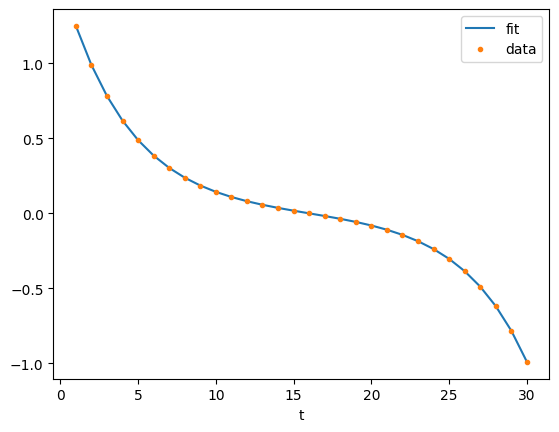

0.26


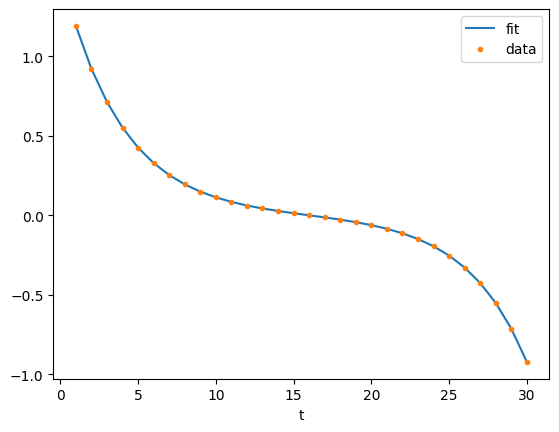

0.29000000000000004


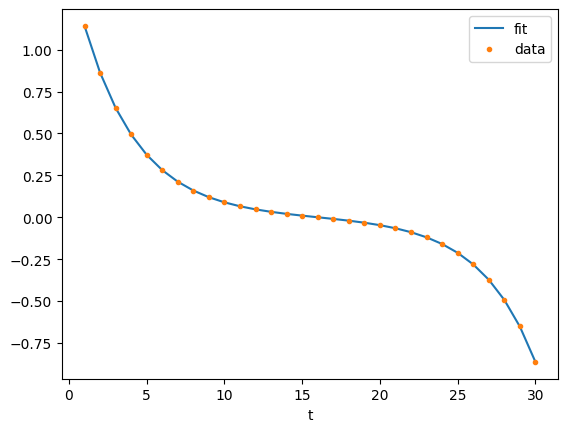

0.31999999999999995


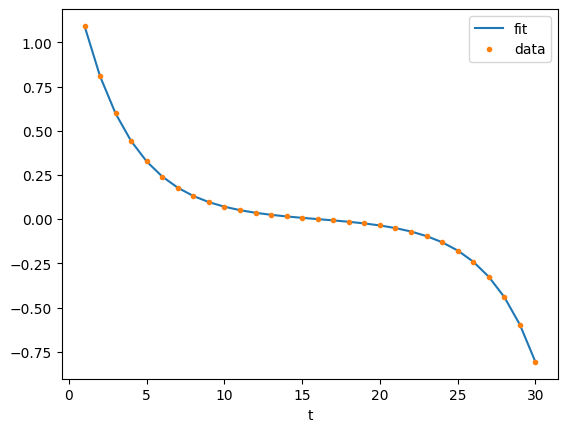

0.35


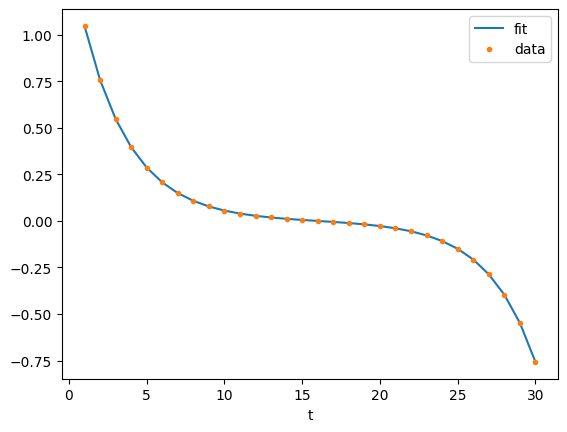

0.38


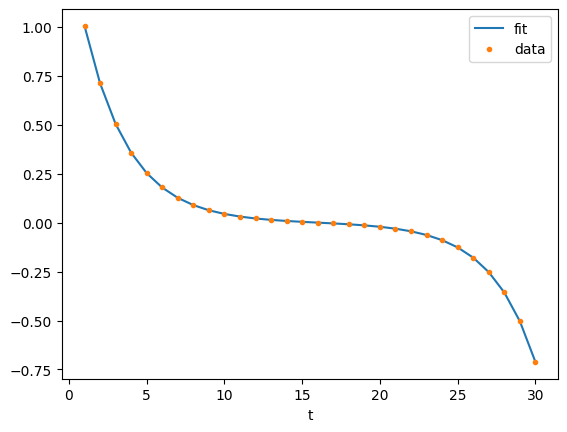

0.41000000000000003


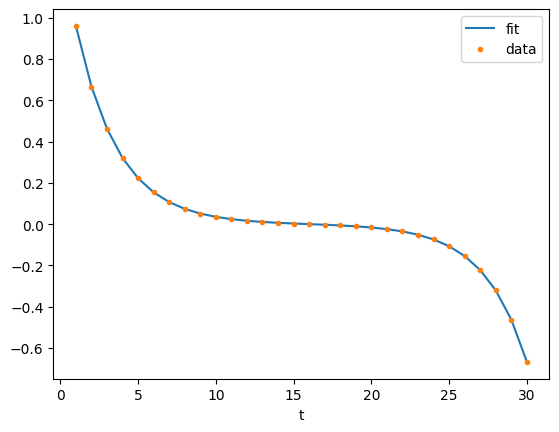

0.44000000000000006


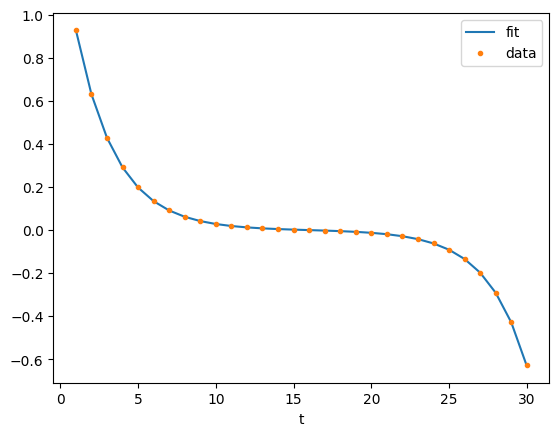

0.47


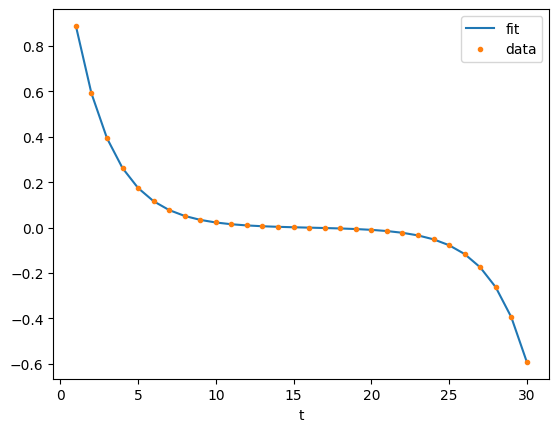

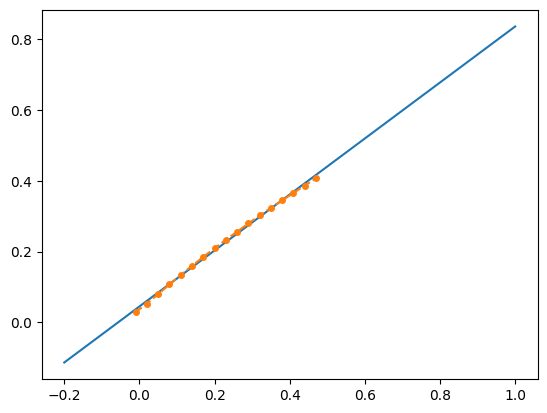

critical mass: -0.05720869372699828


In [42]:
data = []
for sim in simulations:
    
    try:
        if (sim.toml_params[param[0]][param[1]] >= -0.04):
            print(sim.toml_params[param[0]][param[1]])
            val, err = sim.compute_mqphys(printing=False, plotting=True)
            data.append((sim.toml_params[param[0]][param[1]], val, err))
            params, vals, errs = sort_data(data)
    except:
        pass
        
m, b = np.polyfit(params, vals, 1)
xline = np.linspace(-0.2, 1.0, 1000)
plt.plot(xline, m*xline + b)

plt.plot(params, vals, 'o--', markersize=4)
plt.show()
print("critical mass:", -b/m)